In [ ]:
def corelationAnalysisEncrypted(combined_scrambling):
  redChannel = combined_scrambling[:,:,2]
  greenChannel = combined_scrambling[:,:,1]
  blueChannel = combined_scrambling[:,:,0]
  height, width = redChannel.shape
  print(height, width)
  if height>width:
    rangeValue = height
  elif width>height:
    rangeValue = width
  elif height == width:
    rangeValue = height
  c = 0
  count = 0
  while count!=3:
      if count == 0:
        channel = copy(redChannel)
        print("Red channel:")
      elif count == 1:
        channel = copy(greenChannel)
        print("Green channel:")
      elif count == 2:
        channel = copy(blueChannel)
        print("Blue channel:")
    ######################## Horizontal #################################
      randomList_1 = []
      for i in range(rangeValue):
        randomList_1.append(random.randint(0,254))
      
      randomList_2 = copy(randomList_1)
      for i in range(rangeValue):
        randomList_2[i] = randomList_1[i]+1

      xh = []
      for i in range(0,rangeValue):
        xh.append(channel[i][randomList_1[i]])
      yh = []
      for i in range(0,rangeValue):
        yh.append(channel[i][randomList_2[i]])
      plt.xlabel("Horizontal correlation")
      plt.ylabel("(x+1,y) Pixel level")
      sns.scatterplot(x=xh, y=yh)
      plt.savefig('horizontal_frame96_'+str(count)+'.png')
      plt.show()

      sum1_h = 0
      for i in range(0,rangeValue):
        sum1_h = sum1_h + channel[i][randomList_1[i]]
      G = sum1_h//height


      sum2_h = 0
      for i in range(0,rangeValue):
        sum2_h = sum2_h + channel[i][randomList_2[i]]
      H = sum2_h//height


      n_inner_sum = 0
      n_outer_sum = 0
      d_inner_sum_1 = 0
      d_inner_sum_2 = 0
      d_outer_sum_1 = 0
      d_outer_sum_2 = 0



      for i in range(0,height):
        n_inner_sum = 0
        for j in range(0,width):
          multiplication = (channel[j][randomList_1[j]]-G)*(channel[j][randomList_2[j]]-H)
          n_inner_sum+=multiplication
        n_outer_sum+=n_inner_sum

      for i in range(0,height):
        d_inner_sum_1 = 0
        for j in range(0,width):
          multiplication = (channel[j][randomList_1[j]]-G)**2
          d_inner_sum_1+=multiplication
        d_outer_sum_1+=d_inner_sum_1

      for i in range(0,height):
        d_inner_sum_2 = 0
        for j in range(0,width):
          multiplication = (channel[j][randomList_2[j]]-H)**2
          d_inner_sum_2+=multiplication
        d_outer_sum_2+=d_inner_sum_2

      denominator_multiplication = d_outer_sum_1*d_outer_sum_2
      denominator_square_root = math.sqrt(denominator_multiplication)
      rho_horizontal_original = n_outer_sum/denominator_square_root
      print("Rho Horizontal encrypted: ",rho_horizontal_original)
      ################################################################################

      ########################## Vertical ############################################
      sum1_v = 0
      for i in range(0,rangeValue):
        sum1_v = sum1_v + channel[i][randomList_1[i]]
      #print(sum1)
      G = sum1_v//rangeValue


      sum2_v = 0
      for i in range(0,rangeValue):
        sum2_v = sum2_v + channel[i][randomList_2[i]]
      #print(sum2)
      H = sum2_v//rangeValue

      xh = []
      for i in range(0,rangeValue):
        xh.append(channel[randomList_1[i]][i])
      yh = []
      for i in range(0,rangeValue):
        yh.append(channel[randomList_2[i]][i])
      plt.xlabel("Vertical correlation")
      plt.ylabel("(x,y+1) Pixel level")
      sns.scatterplot(x=xh, y=yh)
      plt.savefig('verticalal_frame96_'+str(count)+'.png')
      plt.show()

      n_inner_sum = 0
      n_outer_sum = 0
      d_inner_sum_1 = 0
      d_inner_sum_2 = 0
      d_outer_sum_1 = 0
      d_outer_sum_2 = 0

      for i in range(0,height):
        n_inner_sum = 0
        for j in range(0,width):
          multiplication = (channel[randomList_1[j]][j]-G)*(channel[randomList_2[j]][j]-H)
          n_inner_sum+=multiplication
        n_outer_sum+=n_inner_sum

      for i in range(0,height):
        d_inner_sum_1 = 0
        for j in range(0,width):
          multiplication = (channel[randomList_1[j]][j]-G)**2
          d_inner_sum_1+=multiplication
        d_outer_sum_1+=d_inner_sum_1

      for i in range(0,height):
        d_inner_sum_2 = 0
        for j in range(0,width):
          multiplication = (channel[randomList_2[j]][j]-H)**2
          d_inner_sum_2+=multiplication
        d_outer_sum_2+=d_inner_sum_2

      denominator_multiplication = d_outer_sum_1*d_outer_sum_2
      denominator_square_root = math.sqrt(denominator_multiplication)
      rho_vertical_original = n_outer_sum/denominator_square_root
      print("Rho Vertical encrypted: ",rho_vertical_original)

      ################################################################################

      ############################ Diagonal ##########################################
      diagonal_elements = []
      for i in range(0,rangeValue):
        diagonal_elements.append(channel[i][i])

      for i in range(0,rangeValue):
        for j in range(0,width):
          if (i+j) == width-1:
            diagonal_elements.append(channel[i][j])


      sum1= []
      sum2 = []
      for i in range(0,len(diagonal_elements)):
        if i%2==0:
          sum1.append(diagonal_elements[i])
        elif i%2!=0:
          sum2.append(diagonal_elements[i])

      

      xh = []
      for i in range(0,len(sum1)):
        xh.append(sum1[i])
      yh = []
      for i in range(0,len(sum2)):
        yh.append(sum2[i])
      plt.xlabel("Diagonal correlation (from top left to bottom right)")
      plt.ylabel("(x+1,y+1) Pixel level")
      sns.scatterplot(x=xh, y=yh)
      plt.savefig('diagonalal_frame96_'+str(count)+'.png')
      plt.show()

      avg1 = sum(sum1)//len(sum1)
      avg2 = sum(sum2)//len(sum2)

      outer_sum = 0
      for i in range(0,height):
        inner_sum = 0
        for j in range(0,width):
          multiplication = (sum1[j]-avg1)*(sum2[j]-avg2)
          inner_sum+=multiplication
        outer_sum += inner_sum

      d_inner_sum_1 = 0
      d_inner_sum_2 = 0
      d_outer_sum_1 = 0
      d_outer_sum_2 = 0

      for i in range(0,height):
        d_inner_sum_1 = 0
        for j in range(0,width):
          multiplication = (sum1[j]-avg1)**2
          d_inner_sum_1+=multiplication
        d_outer_sum_1+=d_inner_sum_1

      for i in range(0,height):
        d_inner_sum_2 = 0
        for j in range(0,width):
          multiplication = (sum2[j]-avg2)**2
          d_inner_sum_2+=multiplication
        d_outer_sum_2+=d_inner_sum_2

      denominator_multiplication = d_outer_sum_1*d_outer_sum_2
      denominator_square_root = math.sqrt(denominator_multiplication)
      rho_diagonal = outer_sum/denominator_square_root
      print("Rho diagonal encrypted: ",rho_diagonal)
      count+=1
      print("\n")

def histogramAnalysis(combined_scrambling):
  encrypted_red = combined_scrambling[:,:,2]
  encrypted_green = combined_scrambling[:,:,1]
  encrypted_blue = combined_scrambling[:,:,0]
  height, width = encrypted_red.shape

  red_pixel = []
  for i in range(0,height):
    for j in range(0,width):
      red_pixel.append(encrypted_red[i][j])

  blue_pixel = []
  for i in range(0,height):
    for j in range(0,width):
      blue_pixel.append(encrypted_blue[i][j])

  green_pixel = []
  for i in range(0,height):
    for j in range(0,width):
      green_pixel.append(encrypted_green[i][j])

  
  plt.xlabel('Pixel values')
  plt.ylabel('Number of pixels')
  plt.hist(red_pixel,bins=256, color = "red", lw=0)
  plt.savefig('frame96_red_hist_encrypted.png')
  plt.show()
  print("\n")

  
  plt.xlabel('Pixel values')
  plt.ylabel('Number of pixels')
  plt.hist(green_pixel,bins=256, color = "green", lw=0)
  plt.savefig('frame96_green_hist_encrypted.png')
  plt.show()
  print("\n")

 
  plt.xlabel('Pixel values')
  plt.ylabel('Number of pixels')
  plt.hist(blue_pixel,bins=256, color = "blue", lw=0)
  plt.savefig('frame96_blue_hist_encrypted.png')
  plt.show()
  print("\n")

def histogramAnalysisOriginal(originalFrame):
  encrypted_red = originalFrame[:,:,2]
  encrypted_green = originalFrame[:,:,1]
  encrypted_blue = originalFrame[:,:,0]
  height, width = encrypted_red.shape

  red_pixel = []
  for i in range(0,height):
    for j in range(0,width):
      red_pixel.append(encrypted_red[i][j])

  blue_pixel = []
  for i in range(0,height):
    for j in range(0,width):
      blue_pixel.append(encrypted_blue[i][j])

  green_pixel = []
  for i in range(0,height):
    for j in range(0,width):
      green_pixel.append(encrypted_green[i][j])

  
  plt.xlabel('Pixel values')
  plt.ylabel('Number of pixels')
  plt.hist(red_pixel,bins=256, color = "red", lw=0)
  plt.savefig('frame48_red_hist_original.png')
  plt.show()
  print("\n")

  
  plt.xlabel('Pixel values')
  plt.ylabel('Number of pixels')
  plt.hist(green_pixel,bins=256, color = "green", lw=0)
  plt.savefig('frame48_green_hist_original.png')
  plt.show()
  print("\n")

 
  plt.xlabel('Pixel values')
  plt.ylabel('Number of pixels')
  plt.hist(blue_pixel,bins=256, color = "blue", lw=0)
  plt.savefig('frame48_blue_hist_original.png')
  plt.show()
  print("\n")

def dataloss(combined_scrambling):
  print("HI")
  encrypted_red = combined_scrambling[:,:,2]
  encrypted_green = combined_scrambling[:,:,1]
  encrypted_blue = combined_scrambling[:,:,0]
  height, width = encrypted_red.shape
  for i in range(0,50):
    for j in range(0,50):
      encrypted_red[i][j] = 0
      encrypted_green[i][j] = 0
      encrypted_blue[i][j] = 0
  combined_scrambling = cv2.merge((encrypted_blue, encrypted_green, encrypted_red))
  zigzag_descrambling(combined_scrambling)

def noiseAttack(combined_scrambling):
  noise_array_1=[]
  noise_array_2=[]
  noise_array_3=[]
  noise_array_4=[]
  encrypted_red = combined_scrambling[:,:,2]
  encrypted_green = combined_scrambling[:,:,1]
  encrypted_blue = combined_scrambling[:,:,0]
  for i in range(0,3277):
      noise_array_1.append(random.randint(0,255))
      noise_array_2.append(random.randint(0,255))
  for i in range(0,3277):
      noise_array_3.append(random.randint(0,255))
      noise_array_4.append(random.randint(0,255))
    
  for i in range(0,3277):
      encrypted_red[noise_array_1[i]][noise_array_2[i]] = 0
      encrypted_green[noise_array_1[i]][noise_array_2[i]] = 0
      encrypted_blue[noise_array_1[i]][noise_array_2[i]] = 0
  for i in range(0,3277):
      encrypted_red[noise_array_3[i]][noise_array_4[i]] = 255
      encrypted_green[noise_array_3[i]][noise_array_4[i]] = 255
      encrypted_blue[noise_array_3[i]][noise_array_4[i]] = 255
  
  combined_scrambling = cv2.merge((encrypted_blue, encrypted_green, encrypted_red))
  zigzag_descrambling(combined_scrambling)

key generation time of the program is 1.6277287006378174


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


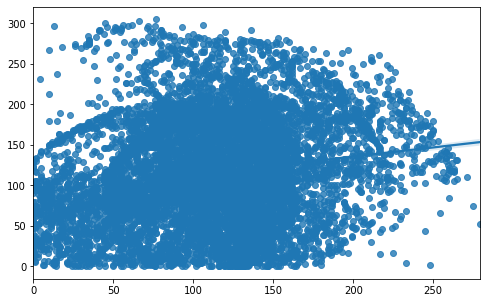

[20, 12, 23, 150, 26, 16, 23, 31, 68, 144, 3, 30, 118, 120, 260, 9, 70, 91, 172, 38, 52, 118, 107, 121, 177, 171, 219, 107, 216, 111, 178, 74, 125, 144, 51, 102, 140, 110, 182, 203, 99, 184, 84, 142, 126, 116, 111, 105, 140, 183, 151, 197, 121, 118, 162, 122, 152, 69, 120, 105, 119, 151, 206, 126, 172, 74, 122, 140, 51, 106, 144, 149, 171, 194, 97, 179, 210, 80, 174, 133, 149, 112, 141, 60, 116, 112, 187, 147, 238, 54, 198, 161, 93, 130, 152, 63, 112, 120, 89, 191, 124, 177, 159, 94, 133, 147, 78, 129, 72, 141, 119, 189, 186, 142, 145, 162, 82, 125, 143, 57, 110, 123, 151, 206, 129, 159, 105, 151, 77, 128, 83, 137, 97, 193, 162, 110, 154, 86, 136, 76, 130, 72, 188, 158, 238, 88, 225, 149, 158, 88, 135, 117, 116, 99, 134, 149, 196, 158, 104, 234, 79, 145, 154, 73, 124, 109, 109, 130, 190, 143, 242, 86, 188, 163, 155, 113, 155, 64, 112, 124, 73, 173, 153, 155, 124, 159, 75, 123, 124, 84, 139, 99, 187, 179, 88, 136, 140, 89, 134, 47, 123, 207, 98, 248, 84, 199, 202, 116, 202, 98, 172, 95,

In [ ]:
#Generate the chaotic array
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import math
from copy import copy
import random
import time
from google.colab.patches import cv2_imshow

start_key = time.time()
'''red = new_lenna_image[:,:,2]
green = new_lenna_image[:,:,1]
blue = new_lenna_image[:,:,0]'''
h = 512
w = 512
dimension = h*w

######################## Generate chaotic array ##############################
################## Tinker bell ################
x_tinker=[0.1]
y_tinker=[0.3]
for i in range(0,dimension-1):
  next_x = (x_tinker[i]**2) - (y_tinker[i]**2) + 0.9*x_tinker[i] - 0.6013*y_tinker[i]
  next_y = 2*x_tinker[i]*y_tinker[i] + 2*x_tinker[i] + 0.5*y_tinker[i]
  x_tinker.append(next_x)
  y_tinker.append(next_y)

    
############### Duffing ########################
x_duff=[0.1]
y_duff=[0.3]
for i in range(0,dimension-1):
    next_x = y_duff[i]
    next_y = 2.75*y_duff[i] - 0.2*x_duff[i] - pow(y_duff[i],3)
    #next_x = next_x*100
    #next_y = next_y*100
    x_duff.append(next_x)
    y_duff.append(next_y)



############# Kaplan yorke map ################
x_kaplan = [0.1]
y_kaplan = [0.3]
for i in range(0,dimension-1):
  next_x = (2*x_kaplan[i])%1
  next_y = 0.2*y_kaplan[i] + math.cos(4*math.pi*y_kaplan[i])
  x_kaplan.append(next_x)
  y_kaplan.append(next_y)

########### Henon ###########################
x_henon=[0.1]
y_henon=[0.3]
for i in range(0,dimension-1):
  next_x = 1 - 1.4*x_henon[i]*x_henon[i] + y_henon[i]
  next_y = 0.3*x_henon[i]
  x_henon.append(next_x)
  y_henon.append(next_y)

#################### Combination of Tinkerbell and Duffing and kaplan map################

td_x_combination = []
td_y_combination = []
for i in range(0,dimension):
  
  td_x_combination.append(x_tinker[i] + x_duff[i])
  td_y_combination.append(y_tinker[i] + y_duff[i])


for i in range(0,dimension):
  td_x_combination[i]*=100
  td_y_combination[i]*=100
  if (td_x_combination[i]<0):
    td_x_combination[i] = -(td_x_combination[i])
  if (td_y_combination[i]<0):
    td_y_combination[i] = -(td_y_combination[i])
  td_x_combination[i] = int(td_x_combination[i])
  td_y_combination[i] = int(td_y_combination[i])

for i in range(0,dimension):
  if h<w:
    if td_x_combination[i]>=h:
      td_x_combination[i]%=h-1                    #divide by samller dimension
    
  elif h>w:
    if td_x_combination[i]>=w:
      td_x_combination[i]%=w-1
      
  elif h==w:
    if td_x_combination[i]>=h:
      td_x_combination[i]%=h-1                    #divide by samller dimension
      


for i in range(0,dimension):
  if h<w:
    if td_y_combination[i]>=h:
      td_y_combination[i]%=h-1
      
  elif h>w:
    if td_y_combination[i]>=w:
      td_y_combination[i]%=w-1

  elif h==w:
    if td_y_combination[i]>=w:
      td_y_combination[i]%=w-1

x = copy(td_x_combination)
y = copy(td_y_combination)

xor_array = []
for i in range(h*w):
  xor_array.append(x[i]*y[i])

for i in range(h*w):
  xor_array[i]%=256

end_key = time.time()
print(f"key generation time of the program is {end_key - start_key}")

f,ax = plt.subplots(figsize = (8,5))
sns.regplot(x[:10000],y[:10000])
plt.savefig("TDmap.eps")
plt.show()

print(x)
print(y)

In [ ]:
def die_harder(flat_red,flat_green,flat_blue):
  red_binary = copy(flat_red)
  green_binary = copy(flat_green)
  blue_binary = copy(flat_blue)

  count = 0
  textfile_red = open("frame96_red_binary.txt", "w")
  for i in range(0, len(red_binary)):
    textfile_red.write(str(red_binary[i]))
  textfile_red.close()
  print("done")

  textfile_green = open("frame96_green_binary.txt", "w")
  for i in range(0, len(green_binary)):
    textfile_green.write(str(green_binary[i]))
  textfile_green.close()
  print("done")

  textfile_blue = open("frame96_blue_binary.txt", "w")
  for i in range(0, len(blue_binary)):
    textfile_blue.write(str(blue_binary[i]))
  textfile_blue.close()
  print("done")
  '''print(*red_binary, sep='')
  print(*green_binary, sep='')
  print(*blue_binary, sep='')'''


#function to convert pixel value to binary digits
def convert_binary(number):
  remainder = []
  if number == 0:
    l = len(remainder)
    difference = 8-l
    for i in range(difference):
      remainder.insert(0,0)
  else:
    while number!=0:
      remainder.append(number%2)
      number = number//2
    l = len(remainder)
    difference = 8-l
    remainder = remainder[::-1]
    if difference<8:
      for i in range(difference):
        remainder.insert(0,0)
  return remainder

def die_harder_test(combined_scrambling):
  encrypted_red = combined_scrambling[:,:,2]
  encrypted_green = combined_scrambling[:,:,1]
  encrypted_blue = combined_scrambling[:,:,0]
  h,w = encrypted_red.shape
  die_hard_red = []
  die_hard_green = []
  die_hard_blue = []
  for i in range(0,h):
    for j in range(0,w):
      binary = convert_binary(encrypted_red[i][j])
      die_hard_red.append(binary)
  
  for i in range(0,h):
    for j in range(0,w):
      binary = convert_binary(encrypted_green[i][j])
      die_hard_green.append(binary)

  for i in range(0,h):
    for j in range(0,w):
      binary = convert_binary(encrypted_blue[i][j])
      die_hard_blue.append(binary)
  
  flat_red = []
  flat_green = []
  flat_blue = []
  for sublist in die_hard_red:
    for item in sublist:
      flat_red.append(item)

  for sublist in die_hard_green:
    for item in sublist:
      flat_green.append(item)

  for sublist in die_hard_blue:
    for item in sublist:
      flat_blue.append(item)

  print(len(flat_red), len(flat_green), len(flat_blue))
  flat_red_copy = copy(flat_red)
  flat_green_copy = copy(flat_green)
  flat_blue_copy = copy(flat_blue)
  die_harder(flat_red_copy,flat_green_copy,flat_blue_copy)

In [ ]:
# print(red)
# cv2_imshow(red)

#to store encrypted frames and later combine them to form video
image_array = []

def mse(combined_scrambling, frame_copy):
    encrypted_red = combined_scrambling[:,:,2]
    encrypted_green = combined_scrambling[:,:,1]
    encrypted_blue = combined_scrambling[:,:,0]
    test_red = frame_copy[:,:,2]
    test_green = frame_copy[:,:,1]
    test_blue = frame_copy[:,:,0]
    h, w, channels = frame_copy.shape

    difference_squared_red = []
    for i in range(0, h):
        for j in range(0, w):
            number = (test_red[i][j] - encrypted_red[i][j]) ** 2
            difference_squared_red.append(number)
    difference_sum_red = sum(difference_squared_red)

    difference_squared_green = []
    for i in range(0, h):
        for j in range(0, w):
            number = (test_green[i][j] - encrypted_green[i][j]) ** 2
            difference_squared_green.append(number)
    difference_sum_green = sum(difference_squared_green)

    difference_squared_blue = []
    for i in range(0, h):
        for j in range(0, w):
            number = (test_blue[i][j] - encrypted_blue[i][j]) ** 2
            difference_squared_blue.append(number)
    difference_sum_blue = sum(difference_squared_blue)

    mse_red = difference_sum_red / (h * w)
    mse_green = difference_sum_green / (h * w)
    mse_blue = difference_sum_blue / (h * w)
    print("Mean squared error red channel: ", mse_red)
    print("Mean squared error green channel: ", mse_green)
    print("Mean squared error blue channel: ", mse_blue)

    psnr_red = 10 * math.log10((255 ** 2) / mse_red)
    psnr_green = 10 * math.log10((255 ** 2) / mse_green)
    psnr_blue = 10 * math.log10((255 ** 2) / mse_blue)
    print("PSNR red channel: ", psnr_red)
    print("PSNR green channel: ", psnr_green)
    print("PSNR blue channel: ", psnr_blue)

def ncpr_uaci(combined_scrambling, frame_copy):
    encrypted_red = combined_scrambling[:,:,2]
    encrypted_green = combined_scrambling[:,:,1]
    encrypted_blue = combined_scrambling[:,:,0]


    changed_red = frame_copy[:,:,2]
    changed_green = frame_copy[:,:,1]
    changed_blue = frame_copy[:,:,0]

    changed_red[12][90] = 123
    changed_green[12][90] = 56
    changed_blue[12][90] = 224

    h,w =encrypted_red.shape

    D_red = np.random.randint(1,size=(h,w))
    D_green = np.random.randint(1,size=(h,w))
    D_blue = np.random.randint(1,size=(h,w))

    for i in range(0,h):
      for j in range(0,w):
        if encrypted_red[i][j] == changed_red[i][j]:
          D_red[i][j] = 0
        else:
          D_red[i][j] = 1

    for i in range(0,h):
      for j in range(0,w):
        if encrypted_green[i][j] == changed_green[i][j]:
          D_green[i][j] = 0
        else:
          D_green[i][j] = 1

    for i in range(0,h):
      for j in range(0,w):
        if encrypted_blue[i][j] == changed_blue[i][j]:
          D_blue[i][j] = 0
        else:
          D_blue[i][j] = 1

    npcr_red = np.sum(D_red)
    npcr_green = np.sum(D_green)
    npcr_blue = np.sum(D_blue)



    npcr_red = (npcr_red/(h*w))*100
    npcr_green = (npcr_green/(h*w))*100
    npcr_blue = (npcr_blue/(h*w))*100

    uaci_red = 0
    uaci_green = 0
    uaci_blue = 0
    for i in range(0,h):
      for j in range(0,w):
        uaci_red += abs(encrypted_red[i][j] - changed_red[i][j])
        uaci_green += abs(encrypted_green[i][j] - changed_green[i][j])
        uaci_blue += abs(encrypted_blue[i][j] - changed_blue[i][j])

    uaci_red = (uaci_red/(h*w*255))*100
    uaci_green = (uaci_green/(h*w*255))*100
    uaci_blue = (uaci_blue/(h*w*255))*100

    print("NPCR values:")
    print("Red channel: ",npcr_red)
    print("Green channel: ",npcr_green)
    print("Blue channel: ",npcr_blue)

    print("\n")
    print("UACI values:")
    print("Red channel: ",uaci_red)
    print("Green channel: ",uaci_green)
    print("Blue channel: ",uaci_blue)



def entropyAnaylsis(combined_scrambling):
    encrypted_red = combined_scrambling[:,:,2]
    encrypted_green = combined_scrambling[:,:,1]
    encrypted_blue = combined_scrambling[:,:,0]
    count_array_red = []
    count_array_green = []
    count_array_blue = []
    red_pixel_list = []
    green_pixel_list = []
    blue_pixel_list = []
    h,w = encrypted_red.shape
    for i in range(0,h*w):
      count_array_red.append(0)
      count_array_green.append(0)
      count_array_blue.append(0)
    for i in range(0,h):
      for j in range(0,w):
        red_pixel_list.append(encrypted_red[i][j])
        green_pixel_list.append(encrypted_green[i][j])
        blue_pixel_list.append(encrypted_blue[i][j])
    
    for i in range(h*w):
      count_array_red[red_pixel_list[i]]+=1
      count_array_green[green_pixel_list[i]]+=1
      count_array_blue[blue_pixel_list[i]]+=1

    red_sum = sum(count_array_red)
    green_sum = sum(count_array_green)
    blue_sum = sum(count_array_blue)

    red_prob_array = []
    green_prob_array = []
    blue_prob_array = []
    for i in range(0,h*w):
      red_prob_array.append(count_array_red[i]/red_sum)
      green_prob_array.append(count_array_green[i]/green_sum)
      blue_prob_array.append(count_array_blue[i]/blue_sum)

    red_entropy_array = []
    green_entropy_array = []
    blue_entropy_array = []
    for i in range(0,h*w):
      if red_prob_array[i] == 0:
        r_entropy = 0
      else:
        r_entropy = red_prob_array[i]*math.log2(1/red_prob_array[i])
      if green_prob_array[i] == 0:
        g_entropy = 0
      else:
        g_entropy = green_prob_array[i]*math.log2(1/green_prob_array[i])
      if blue_prob_array[i] == 0:
        b_entropy = 0
      else:
        b_entropy = blue_prob_array[i]*math.log2(1/blue_prob_array[i])

      red_entropy_array.append(r_entropy)
      green_entropy_array.append(g_entropy)
      blue_entropy_array.append(b_entropy)

    red_entropy = sum(red_entropy_array)
    green_entropy = sum(green_entropy_array)
    blue_entropy = sum(blue_entropy_array)

    print("Red entropy: ",red_entropy)
    print("Green_entropy: ",green_entropy)
    print("Blue entropy: ",blue_entropy)



def chaotic_scrambling(new_lenna_image, frameCount):
    start_chaotic_scrambling = time.time()
    frame_copy = copy(new_lenna_image)
    red = new_lenna_image[:, :, 2]
    green = new_lenna_image[:, :, 1]
    blue = new_lenna_image[:, :, 0]
    h, w = red.shape
    dimension = h * w
    
    ########################Chaotic Scrambling ##########################################

    # RED CHANNEL
    count1 = 0
    for i in range(0, h):
        for j in range(0, w):
            red[i][j] = red[i][j] ^ xor_array[count1]
            count1 += 1

    # GREEN CHANNEL
    count3 = 0
    for i in range(0, h):
        for j in range(0, w):
            green[i][j] = green[i][j] ^ xor_array[count3]
            count3 += 1

    # BLUE CHANNEL
    count5 = 0
    for i in range(0, h):
        for j in range(0, w):
            blue[i][j] = blue[i][j] ^ xor_array[count5]
            count5 += 1

    chaotic_xor_image = cv2.merge((blue, green, red))
    # print("Image after xor operation")
    # cv2_imshow(chaotic_xor_image)
    end_chaotic_scrambling = time.time()
    chaotic_scrambling_e_time = end_chaotic_scrambling - start_chaotic_scrambling
    chaotic_swapping(red, green, blue, x, y, frame_copy, frameCount, chaotic_scrambling_e_time)


def chaotic_swapping(red, green, blue, x, y, frame_copy, frameCount, chaotic_scrambling_e_time):
    h, w = red.shape
    start_chaotic_swapping = time.time()
    count = 0
    for i in range(0, h):
        for j in range(0, w):
            temp = red[i][j]
            red[i][j] = red[x[count]][y[count]]
            red[x[count]][y[count]] = temp
            count += 1

    count = 0
    for i in range(0, h):
        for j in range(0, w):
            temp = green[i][j]
            green[i][j] = green[x[count]][y[count]]
            green[x[count]][y[count]] = temp
            count += 1

    count = 0
    for i in range(0, h):
        for j in range(0, w):
            temp = blue[i][j]
            blue[i][j] = blue[x[count]][y[count]]
            blue[x[count]][y[count]] = temp
            count += 1

    image_to_zigzag = cv2.merge((blue, green, red))
    end_chaotic_swapping = time.time()
    chaotic_swapping_e_time = end_chaotic_swapping - start_chaotic_swapping
    zigzag_scrambling(image_to_zigzag, frame_copy, frameCount, chaotic_swapping_e_time, chaotic_scrambling_e_time)


################################# Chaotic scrambling ends ######################

################################ Zigzag scarmbling #############################


def zigzag_scrambling(image_to_zigzag, frame_copy, frameCount, chaotic_swapping_e_time, chaotic_scrambling_e_time):
    blue, green, red = cv2.split(image_to_zigzag)
    h, w = red.shape
    start_zigzag = time.time()
    value = h + w - 1
    overall_count = 0
    solution_array = [[], [], []]

    if h == w:
        while overall_count != 3:
            diag = 0
            i = 0
            j = 0
            flag = 0
            if overall_count == 0:
                channel = copy(red)
            elif overall_count == 1:
                channel = copy(green)
            elif overall_count == 2:
                channel = copy(blue)

            solution_array[overall_count].append(channel[i][j])
            while diag != value - 1:

                if i == 0 and j != w - 1:
                    j += 1
                    solution_array[overall_count].append(channel[i][j])
                    if i == 0 and j == w - 1:
                        while i != h - 1:
                            i += 1
                            j -= 1
                            solution_array[overall_count].append(channel[i][j])
                        flag = 1
                    while j != 0 and flag == 0:
                        i += 1
                        j -= 1
                        solution_array[overall_count].append(channel[i][j])
                    diag += 1

                if i != 0 and i != h - 1 and j == 0:
                    i += 1
                    solution_array[overall_count].append(channel[i][j])
                    while i != 0:
                        i -= 1
                        j += 1
                        solution_array[overall_count].append(channel[i][j])
                    diag += 1

                if i != 0 and j == w - 1:
                    i += 1
                    if i == h - 1 and j == w - 1:
                        solution_array[overall_count].append(channel[i][j])
                        break  # update
                    else:
                        temp = i
                        solution_array[overall_count].append(channel[i][j])
                        while j != temp:
                            i += 1
                            j -= 1
                            solution_array[overall_count].append(channel[i][j])
                        diag += 1

                if i != 0 and i == h - 1 and j == 0:
                    j += 1
                    temp = j
                    solution_array[overall_count].append(channel[i][j])
                    while i != temp:
                        i -= 1
                        j += 1
                        solution_array[overall_count].append(channel[i][j])
                    diag += 1

                if i == h - 1 and j != 0:
                    j += 1
                    solution_array[overall_count].append(channel[i][j])
                    if i == h - 1 and j == w - 1:
                        break

                    else:
                        while j != w - 1:
                            j += 1
                            i -= 1
                            solution_array[overall_count].append(channel[i][j])
                            diag += 1

                if i == h - 1 and j == 0:
                    j += 1
                    solution_array[overall_count].append(channel[i][j])
                    while j != w - 1:
                        j += 1
                        i -= 1
                        solution_array[overall_count].append(channel[i][j])
                    diag += 1

                if i == 0 and j == w - 1:  # update.
                    i += 1
                    solution_array[overall_count].append(channel[i][j])
                    while i != h - 1:
                        i += 1
                        j -= 1
                        solution_array[overall_count].append(channel[i][j])
                    diag += 1
            # print(red_solution_array)
            # print(solution_array[overall_count])
            # print(len(solution_array[overall_count]))
            
            overall_count += 1

    if h > w:
        while overall_count != 3:
            diag = 0
            i = 0
            j = 0
            flag = 0
            odd_flag = 0
            even_flag = 0
            left_flag = 0
            if overall_count == 0:
                channel = copy(red)
            elif overall_count == 1:
                channel = copy(green)
            elif overall_count == 2:
                channel = copy(blue)

            solution_array[overall_count].append(channel[i][j])
            while diag != value - 1:
                if i == 0 and j != w - 1:
                    j += 1
                    solution_array[overall_count].append(channel[i][j])
                    if i == 0 and j == w - 1 and w % 2 == 0:
                        even_flag = 1
                        while i != w - 1:
                            i += 1
                            j -= 1
                            solution_array[overall_count].append(channel[i][j])
                    while (j != 0 and even_flag == 0) or (j != 0 and odd_flag == 0):
                        i += 1
                        j -= 1
                        solution_array[overall_count].append(channel[i][j])
                    diag += 1

                if i != 0 and i != h - 1 and j == 0:
                    i += 1
                    # print(i,j)
                    solution_array[overall_count].append(channel[i][j])
                    if i == h - 1 and even_flag == 1:
                        left_flag = 1
                        # j+=1
                        # solution_array[overall_count].append(channel[i][j])
                        while j != w - 1:
                            j += 1
                            i -= 1
                            solution_array[overall_count].append(channel[i][j])
                        diag += 1

                    elif i == h - 1 and odd_flag == 1:
                        left_flag = 1
                        while j != w - 1:
                            i -= 1
                            j += 1
                            solution_array[overall_count].append(channel[i][j])
                        diag += 1

                    elif even_flag == 1 or odd_flag == 1:
                        while j != w - 1:
                            i -= 1
                            j += 1
                            solution_array[overall_count].append(channel[i][j])
                        diag += 1

                    else:
                        temp = copy(i)
                        while j != temp:
                            i -= 1
                            j += 1
                            solution_array[overall_count].append(channel[i][j])
                        diag += 1

                if i != 0 and j == w - 1:
                    i += 1
                    solution_array[overall_count].append(channel[i][j])
                    if i == h - 1 and j == w - 1:

                        break
                    elif left_flag == 1:
                        while i != h - 1:
                            i += 1
                            j -= 1
                            solution_array[overall_count].append(channel[i][j])
                        diag += 1
                    else:
                        while j != 0:  # doubtful
                            i += 1
                            j -= 1
                            # print(i,j)
                            solution_array[overall_count].append(channel[i][j])
                        diag += 1

                if i == h - 1 and j != w - 1:
                    if i == h - 1 and j == 0:
                        left_flag = 1
                    j += 1
                    solution_array[overall_count].append(channel[i][j])
                    if i == h - 1 and j == w - 1:
                        break
                    else:
                        while j != w - 1:
                            i -= 1
                            j += 1
                            solution_array[overall_count].append(channel[i][j])
                        diag += 1

                if i == 0 and j == w - 1 and (w % 2) != 0:
                    # print("h")
                    i += 1
                    solution_array[overall_count].append(channel[i][j])
                    odd_flag = 1
                    while j != 0:
                        j -= 1
                        i += 1
                        solution_array[overall_count].append(channel[i][j])
                    diag += 1

            # print(solution_array[overall_count])
            # print(len(solution_array[overall_count]))
            overall_count += 1

    if h < w:
        while overall_count != 3:
            diag = 0
            i = 0
            j = 0
            flag = 0
            odd_flag = 0
            even_flag = 0
            right_diag = 0
            if overall_count == 0:
                channel = copy(red)
            elif overall_count == 1:
                channel = copy(green)
            elif overall_count == 2:
                channel = copy(blue)
            solution_array[overall_count].append(channel[i][j])

            while diag != value - 1:
                if i == 0 and j != w - 1:
                    j += 1
                    solution_array[overall_count].append(channel[i][j])
                    if j == h - 1:
                        while i != h - 1:
                            i += 1
                            j -= 1
                            solution_array[overall_count].append(channel[i][j])
                        even_flag = 1
                        diag += 1

                    elif j == w - 1:
                        if even_flag == 1 and w % 2 == 0:
                            # i+=1
                            # solution_array[overall_count].append(channel[i][j])
                            while i != h - 1:
                                i += 1
                                j -= 1
                                solution_array[overall_count].append(channel[i][j])
                            diag += 1
                            right_diag = 1


                        elif odd_flag == 1 and w % 2 == 0:
                            while i != h - 1:
                                i += 1
                                j -= 1
                                solution_array[overall_count].append(channel[i][j])
                            diag += 1
                            right_diag = 1
                        elif odd_flag == 1 and w % 2 != 0:
                            i += 1
                            while i != h - 1:
                                i += 1
                                j -= 1
                                solution_array[overall_count].append(channel[i][j])
                            diag += 1
                            right_diag = 1


                    elif even_flag == 0 and odd_flag == 0:
                        while j != 0:
                            j -= 1
                            i += 1
                            solution_array[overall_count].append(channel[i][j])
                        diag += 1

                    elif even_flag == 1 or odd_flag == 1:
                        while i != h - 1:
                            i += 1
                            j -= 1
                            solution_array[overall_count].append(channel[i][j])
                        diag += 1

                if i != 0 and i != h - 1 and j == 0:
                    i += 1
                    solution_array[overall_count].append(channel[i][j])
                    if i == h - 1:
                        temp = copy(i)
                        odd_flag = 1
                        while j != temp:
                            j += 1
                            i -= 1
                            solution_array[overall_count].append(channel[i][j])
                        diag += 1
                    else:
                        temp = copy(i)
                        while j != temp:
                            j += 1
                            i -= 1
                            solution_array[overall_count].append(channel[i][j])
                        diag += 1

                if i == 0 and j == w - 1:
                    right_diag += 1
                    i += 1
                    solution_array[overall_count].append(channel[i][j])
                    while i != h - 1:
                        i -= 1
                        j += 1
                        solution_array[overall_count].append(channel[i][j])
                    diag += 1

                if i == h - 1 and j != w - 1:
                    j += 1
                    solution_array[overall_count].append(channel[i][j])
                    if j == w - 1:
                        break
                    elif right_diag == 0:
                        while i != 0:
                            i -= 1
                            j += 1
                            solution_array[overall_count].append(channel[i][j])
                        diag += 1
                        if j == w - 1:
                            right_diag = 1
                    elif right_diag == 1:
                        while j != w - 1:
                            j += 1
                            i -= 1
                            solution_array[overall_count].append(channel[i][j])
                        diag += 1

                if i != 0 and i != h - 1 and j == w - 1:
                    i += 1
                    solution_array[overall_count].append(channel[i][j])
                    if i == h - 1 and j == w - 1:
                        # solution_array[overall_count].append(channel[i][j])
                        break
                    else:
                        while i != h - 1:
                            i += 1
                            j -= 1
                            solution_array[overall_count].append(channel[i][j])
                        diag += 1

            # print(solution_array[overall_count])
            # print(len(solution_array[overall_count]))
            overall_count += 1

    ###########################zigzag matrix formation #############################
    encrypted_red = []
    encrypted_green = []
    encrypted_blue = []
    for i in range(0, h):
        row = []
        for j in range(0, w):
            row.append(0)
        encrypted_red.append(row)
        encrypted_green.append(row)
        encrypted_blue.append(row)

    encrypted_red = np.array(encrypted_red)
    encrypted_green = np.array(encrypted_green)
    encrypted_blue = np.array(encrypted_blue)

    c = 0
    while c != 3:
        if c == 0:
            red_count = 0
            for i in range(0, h):
                for j in range(0, w):
                    encrypted_red[i][j] = solution_array[c][red_count]
                    red_count += 1

        elif c == 1:
            green_count = 0
            for i in range(0, h):
                for j in range(0, w):
                    encrypted_green[i][j] = solution_array[c][green_count]
                    green_count += 1

        elif c == 2:
            blue_count = 0
            for i in range(0, h):
                for j in range(0, w):
                    encrypted_blue[i][j] = solution_array[c][blue_count]
                    blue_count += 1

        c += 1

    ######################## Encryption ends #######################################

    ############# Function call ############################

    combined_scrambling = cv2.merge((encrypted_blue, encrypted_green, encrypted_red))
    end_zigzag = time.time()
    zigzag_e_time = end_zigzag - start_zigzag
    e_time_sum = zigzag_e_time + chaotic_swapping_e_time + chaotic_scrambling_e_time
    #time_array.append(e_time_sum)
    #if frameCount==149:
      #print(sum(time_array))
    #print("\n")

    #cv2.imwrite(str(frameCount)+".jpg", combined_scrambling)
    #if frameCount==1:
      #cv2_imshow(combined_scrambling)
    zigzag_descrambling(combined_scrambling, frameCount, e_time_sum)
      #dataloss(combined_scrambling)
      #noiseAttack(combined_scrambling)
      #die_harder_test(combined_scrambling)
    '''mse(combined_scrambling, frame_copy)
      entropyAnaylsis(combined_scrambling)
      ncpr_uaci(combined_scrambling, frame_copy)
      histogramAnalysis(combined_scrambling)
      corelationAnalysisEncrypted(combined_scrambling)
      histogramAnalysisOriginal(frame_copy)'''
      
    #ncpr_uaci(combined_scrambling)
    #print("\nEncryption time:", time.perf_counter())
    #zigzag_descrambling(combined_scrambling)
    #cv2_imshow('', combined_scrambling)
    #fourcc = cv2.VideoWriter_fourcc(*'XVID')
    #out = cv2.VideoWriter('output_encrypted_2.avi', fourcc, 20.0, (640, 480))
    #out.write(combined_scrambling)



# ********************************************************************************
# ********************************************************************************
# ********************************************************************************


def zigzag_descrambling(combined_scrambling, frameCount, e_time_sum):
    ##############################Zigzag desrcambling begins #######################
    received_blue, received_green, received_red = cv2.split(combined_scrambling)
    h, w = received_red.shape
    dimension = h * w
    start_zigzag_dec = time.time()
    

    red_traversal_array = []
    for i in range(0, h):
        for j in range(0, w):
            red_traversal_array.append(received_red[i][j])

    green_traversal_array = []
    for i in range(0, h):
        for j in range(0, w):
            green_traversal_array.append(received_green[i][j])

    blue_traversal_array = []
    for i in range(0, h):
        for j in range(0, w):
            blue_traversal_array.append(received_blue[i][j])

    matrix = []
    for i in range(0, h):
        row = []
        for j in range(0, w):
            row.append(0)
        matrix.append(row)

    zero_array = np.array(matrix)

    overall_count = 0
    value = h + w - 1
    if h == w:
        while overall_count != 3:
            diag = 0
            i = 0
            j = 0
            flag = 0
            count = 0
            if overall_count == 0:
                traversal_array = red_traversal_array
                decrypted_array = copy(zero_array)
                decrypted_array[i][j] = traversal_array[count]

            if overall_count == 1:
                traversal_array = green_traversal_array
                decrypted_array = copy(zero_array)
                decrypted_array[i][j] = traversal_array[count]

            if overall_count == 2:
                traversal_array = blue_traversal_array
                decrypted_array = copy(zero_array)
                decrypted_array[i][j] = traversal_array[count]

            count += 1
            while diag != value - 1:

                if i == 0 and j != w - 1:
                    j += 1
                    decrypted_array[i][j] = traversal_array[count]
                    count += 1
                    if i == 0 and j == w - 1:
                        while i != h - 1:
                            i += 1
                            j -= 1
                            decrypted_array[i][j] = traversal_array[count]
                            count += 1
                        flag = 1
                    while j != 0 and flag == 0:
                        i += 1
                        j -= 1
                        decrypted_array[i][j] = traversal_array[count]
                        count += 1
                    diag += 1

                if i != 0 and i != h - 1 and j == 0:
                    i += 1
                    decrypted_array[i][j] = traversal_array[count]
                    count += 1
                    while i != 0:
                        i -= 1
                        j += 1
                        decrypted_array[i][j] = traversal_array[count]
                        count += 1
                    diag += 1

                if i != 0 and j == w - 1:
                    i += 1
                    temp = i
                    decrypted_array[i][j] = traversal_array[count]
                    count += 1
                    while j != temp:
                        i += 1
                        j -= 1
                        decrypted_array[i][j] = traversal_array[count]
                        count += 1
                    diag += 1

                if i != 0 and i == h - 1 and j == 0:
                    j += 1
                    temp = j
                    decrypted_array[i][j] = traversal_array[count]
                    count += 1
                    while i != temp:
                        i -= 1
                        j += 1
                        decrypted_array[i][j] = traversal_array[count]
                        count += 1
                    diag += 1

                if i == h - 1 and j != 0:
                    j += 1
                    decrypted_array[i][j] = traversal_array[count]
                    count += 1
                    if i == h - 1 and j == w - 1:
                        break

                    else:
                        while j != w - 1:
                            j += 1
                            i -= 1
                            decrypted_array[i][j] = traversal_array[count]
                            count += 1
                            diag += 1

                if i == h - 1 and j == 0:
                    j += 1
                    decrypted_array[i][j] = traversal_array[count]
                    count += 1
                    while j != w - 1:
                        j += 1
                        i -= 1
                        decrypted_array[i][j] = traversal_array[count]
                        count += 1
                    diag += 1

            if overall_count == 0:
                red_decrypted_array = copy(decrypted_array)

            elif overall_count == 1:
                green_decrypted_array = copy(decrypted_array)

            elif overall_count == 2:
                blue_decrypted_array = copy(decrypted_array)

            overall_count += 1

    elif h > w:
        while overall_count != 3:
            diag = 0
            i = 0
            j = 0
            flag = 0
            odd_flag = 0
            even_flag = 0
            left_flag = 0
            count = 0

            if overall_count == 0:
                traversal_array = red_traversal_array
                decrypted_array = copy(zero_array)
                decrypted_array[i][j] = traversal_array[count]

            if overall_count == 1:
                traversal_array = green_traversal_array
                decrypted_array = copy(zero_array)
                decrypted_array[i][j] = traversal_array[count]

            if overall_count == 2:
                traversal_array = blue_traversal_array
                decrypted_array = copy(zero_array)
                decrypted_array[i][j] = traversal_array[count]

            count += 1

            while diag != value - 1:
                if i == 0 and j != w - 1:
                    j += 1
                    decrypted_array[i][j] = traversal_array[count]
                    count += 1
                    if i == 0 and j == w - 1 and w % 2 == 0:
                        even_flag = 1
                        while i != w - 1:
                            i += 1
                            j -= 1
                            decrypted_array[i][j] = traversal_array[count]
                            count += 1
                    while (j != 0 and even_flag == 0) or (j != 0 and odd_flag == 0):
                        i += 1
                        j -= 1
                        decrypted_array[i][j] = traversal_array[count]
                        count += 1
                    diag += 1

                if i != 0 and i != h - 1 and j == 0:
                    i += 1
                    # print(i,j)
                    decrypted_array[i][j] = traversal_array[count]
                    count += 1
                    if i == h - 1 and even_flag == 1:
                        left_flag = 1
                        # j+=1
                        # solution_array[overall_count].append(channel[i][j])
                        while j != w - 1:
                            j += 1
                            i -= 1
                            decrypted_array[i][j] = traversal_array[count]
                            count += 1
                        diag += 1

                    elif i == h - 1 and odd_flag == 1:
                        print("h")
                        left_flag = 1
                        while j != w - 1:
                            i -= 1
                            j += 1
                            decrypted_array[i][j] = traversal_array[count]
                            count += 1
                        diag += 1

                    elif even_flag == 1 or odd_flag == 1:
                        while j != w - 1:
                            i -= 1
                            j += 1
                            decrypted_array[i][j] = traversal_array[count]
                            count += 1
                        diag += 1

                    else:
                        temp = copy(i)
                        while j != temp:
                            i -= 1
                            j += 1
                            decrypted_array[i][j] = traversal_array[count]
                            count += 1
                        diag += 1

                if i != 0 and j == w - 1:
                    i += 1
                    decrypted_array[i][j] = traversal_array[count]
                    count += 1
                    if i == h - 1 and j == w - 1:
                        diag += 1
                        break
                    elif left_flag == 1:
                        while i != h - 1:
                            i += 1
                            j -= 1
                            decrypted_array[i][j] = traversal_array[count]
                            count += 1
                        diag += 1
                    else:
                        while j != 0:  # doubtful
                            i += 1
                            j -= 1
                            # print(i,j)
                            decrypted_array[i][j] = traversal_array[count]
                            count += 1
                        diag += 1

                if i == h - 1 and j != w - 1:
                    if i == h - 1 and j == 0:
                        left_flag = 1
                    j += 1
                    decrypted_array[i][j] = traversal_array[count]
                    count += 1
                    if i == h - 1 and j == w - 1:
                        break
                    else:
                        while j != w - 1:
                            i -= 1
                            j += 1
                            decrypted_array[i][j] = traversal_array[count]
                            count += 1
                        diag += 1

                if i == 0 and j == w - 1 and (w % 2) != 0:
                    # print("h")
                    i += 1
                    decrypted_array[i][j] = traversal_array[count]
                    count += 1
                    odd_flag = 1
                    while j != 0:
                        j -= 1
                        i += 1
                        decrypted_array[i][j] = traversal_array[count]
                        count += 1
                    diag += 1


            if overall_count == 0:
                red_decrypted_array = copy(decrypted_array)

            elif overall_count == 1:
                green_decrypted_array = copy(decrypted_array)

            elif overall_count == 2:
                blue_decrypted_array = copy(decrypted_array)
            overall_count += 1


    elif h < w:
        while overall_count != 3:
            diag = 0
            i = 0
            j = 0
            flag = 0
            odd_flag = 0
            even_flag = 0
            right_diag = 0
            count = 0

            if overall_count == 0:
                traversal_array = red_traversal_array
                decrypted_array = copy(zero_array)
                decrypted_array[i][j] = traversal_array[count]

            if overall_count == 1:
                traversal_array = green_traversal_array
                decrypted_array = copy(zero_array)
                decrypted_array[i][j] = traversal_array[count]

            if overall_count == 2:
                traversal_array = blue_traversal_array
                decrypted_array = copy(zero_array)
                decrypted_array[i][j] = traversal_array[count]

            count += 1
            while diag != value - 1:
                if i == 0 and j != w - 1:
                    j += 1
                    decrypted_array[i][j] = traversal_array[count]
                    count += 1
                    if j == h - 1:
                        while i != h - 1:
                            i += 1
                            j -= 1
                            decrypted_array[i][j] = traversal_array[count]
                            count += 1
                        even_flag = 1
                        diag += 1

                    elif j == w - 1:
                        if even_flag == 1 and w % 2 == 0:
                            while i != h - 1:
                                i += 1
                                j -= 1
                                decrypted_array[i][j] = traversal_array[count]
                                count += 1
                            diag += 1
                            right_diag = 1

                        elif odd_flag == 1 and w % 2 == 0:
                            while i != h - 1:
                                i += 1
                                j -= 1
                                decrypted_array[i][j] = traversal_array[count]
                                count += 1
                            diag += 1
                            right_diag = 1
                        elif odd_flag == 1 and w % 2 != 0:
                            i += 1
                            while i != h - 1:
                                i += 1
                                j -= 1
                                decrypted_array[i][j] = traversal_array[count]
                                count += 1
                            diag += 1
                            right_diag = 1


                    elif even_flag == 0 and odd_flag == 0:
                        while j != 0:
                            j -= 1
                            i += 1
                            decrypted_array[i][j] = traversal_array[count]
                            count += 1
                        diag += 1

                    elif even_flag == 1 or odd_flag == 1:
                        while i != h - 1:
                            i += 1
                            j -= 1
                            decrypted_array[i][j] = traversal_array[count]
                            count += 1
                        diag += 1

                if i != 0 and i != h - 1 and j == 0:
                    i += 1
                    decrypted_array[i][j] = traversal_array[count]
                    count += 1
                    if i == h - 1:
                        temp = copy(i)
                        odd_flag = 1
                        while j != temp:
                            j += 1
                            i -= 1
                            decrypted_array[i][j] = traversal_array[count]
                            count += 1
                        diag += 1
                    else:
                        temp = copy(i)
                        while j != temp:
                            j += 1
                            i -= 1
                            decrypted_array[i][j] = traversal_array[count]
                            count += 1
                        diag += 1

                if i == 0 and j == w - 1:
                    # right_diag+=1
                    i += 1
                    decrypted_array[i][j] = traversal_array[count]
                    count += 1
                    while i != h - 1:
                        i -= 1
                        j += 1
                        decrypted_array[i][j] = traversal_array[count]
                        count += 1
                    diag += 1

                if i == h - 1 and j != w - 1:
                    j += 1
                    decrypted_array[i][j] = traversal_array[count]
                    count += 1
                    if j == w - 1:
                        break
                    elif right_diag == 0:
                        while i != 0:
                            i -= 1
                            j += 1
                            decrypted_array[i][j] = traversal_array[count]
                            count += 1
                        diag += 1
                        if j == w - 1:
                            right_diag = 1
                    elif right_diag == 1:
                        while j != w - 1:
                            j += 1
                            i -= 1
                            decrypted_array[i][j] = traversal_array[count]
                            count += 1
                        diag += 1

                if i != 0 and i != h - 1 and j == w - 1:
                    i += 1
                    decrypted_array[i][j] = traversal_array[count]
                    count += 1
                    if i == h - 1 and j == w - 1:
                        # solution_array[overall_count].append(channel[i][j])
                        break
                    else:
                        while i != h - 1:
                            i += 1
                            j -= 1
                            decrypted_array[i][j] = traversal_array[count]
                            count += 1
                        diag += 1

            if overall_count == 0:
                red_decrypted_array = copy(decrypted_array)

            elif overall_count == 1:
                green_decrypted_array = copy(decrypted_array)

            elif overall_count == 2:
                blue_decrypted_array = copy(decrypted_array)
            overall_count += 1

    decrypted_zigzag_channel = cv2.merge((blue_decrypted_array, green_decrypted_array, red_decrypted_array))
    end_zigzag_dec = time.time()
    d_zigzag_time = end_zigzag_dec - start_zigzag_dec
    # print("\nDecrypted image after inverse zigzag:")
    # cv2_imshow(decrypted_zigzag_channel)

    # print("Combined zigzag encrypted image")
    # cv2_imshow(combined_zigzag_channel)
    # print("Decrypted image")
    # cv2_imshow(decrypted_zigzag_channel)
    chaotic_deswapping(decrypted_zigzag_channel, frameCount, d_zigzag_time, e_time_sum)


########################################################################################
def chaotic_deswapping(decrypted_zigzag_channel, frameCount, d_zigzag_time, e_time_sum):
    blue, green, red = cv2.split(decrypted_zigzag_channel)
    h, w = red.shape
    dimension = h * w
    start_chaotic_deswapping = time.time()

    count = dimension - 1
    for i in range(h - 1, -1, -1):
        for j in range(w - 1, -1, -1):
            temp = red[i][j]
            red[i][j] = red[x[count]][y[count]]
            red[x[count]][y[count]] = temp
            count -= 1

    count = dimension - 1
    for i in range(h - 1, -1, -1):
        for j in range(w - 1, -1, -1):
            temp = green[i][j]
            green[i][j] = green[x[count]][y[count]]
            green[x[count]][y[count]] = temp
            count -= 1

    count = dimension - 1
    for i in range(h - 1, -1, -1):
        for j in range(w - 1, -1, -1):
            temp = blue[i][j]
            blue[i][j] = blue[x[count]][y[count]]
            blue[x[count]][y[count]] = temp
            count -= 1
    chaotic_xor_image_2 = cv2.merge((blue, green, red))
    # print("Image after chaotic deswapping.")
    # cv2_imshow(chaotic_xor_image_2)
    end_chaotic_deswapping = time.time()
    d_chaotic_scrambling_time = end_chaotic_deswapping - start_chaotic_deswapping
    chaotic_descrambling(red, green, blue, xor_array, x, y, frameCount, d_zigzag_time, d_chaotic_scrambling_time, e_time_sum)


def chaotic_descrambling(red, green, blue, xor_array, x, y, frameCount, d_zigzag_time, d_chaotic_scrambling_time, e_time_sum):
    h, w = red.shape
    dimension = h * w
    start_chaotic_descrambling = time.time()
    count2 = dimension - 1  # RED DECRYPTION
    for i in range(h - 1, -1, -1):
        for j in range(w - 1, -1, -1):
            red[i][j] = red[i][j] ^ xor_array[count2]
            count2 -= 1

    count4 = dimension - 1  # GREEN DECRYPTION
    for i in range(h - 1, -1, -1):
        for j in range(w - 1, -1, -1):
            green[i][j] = green[i][j] ^ xor_array[count4]
            count4 -= 1

    count6 = dimension - 1  # BLUE DECRYPTION
    for i in range(h - 1, -1, -1):
        for j in range(w - 1, -1, -1):
            blue[i][j] = blue[i][j] ^ xor_array[count6]
            count6 -= 1

    ############################################ DECRYPTION ENDS ##############################################

    ###############################################################################
    received_image = cv2.merge((blue, green, red))
    #cv2.imwrite("/content/drive/MyDrive/DSCI/Video/Decrypted2/"+str(frameCount)+".jpg", received_image)
    #cv2.imwrite("D-"+str(frameCount)+".jpg", received_image)
    end_chaotic_descrambling = time.time()
    d_chaotic_descrambling_time = end_chaotic_descrambling - start_chaotic_descrambling
    #print("\n")
    #final_blue, final_green, final_red = cv2.split(received_image)
    #cv2_imshow(received_image)
    #print("\nDecryption time:", time.perf_counter())
    d_time_sum = d_zigzag_time+d_chaotic_scrambling_time+d_chaotic_descrambling_time
    time_array.append(e_time_sum+d_time_sum)
    if frameCount==149:
      print(sum(time_array))


time_array = []
frameCount = 0
video = cv2.VideoCapture('drone_video.avi')
#video.set(cv2.CAP_PROP_FPS, 1000)
full_start = time.time()
target = 30
counter = 0
while (video.isOpened()):

    # Capture frame-by-frame
    #time_elapsed = time.time() - prev
    #cv2.waitKey(1000)
    ret, frame = video.read()
    if ret == True:
    #if time_elapsed > 1./frame_rate:
        #prev = time.time()
        frame = cv2.resize(frame, (512, 512))
        #if frameCount == 29 or frameCount == 59 or frameCount == 89 or frameCount == 119:
          #cv2_imshow(frame)
          #chaotic_scrambling(frame, frameCount)
        #cv2_imshow(frame)
        chaotic_scrambling(frame, frameCount)
        frameCount+=1


        # Press Q on keyboard to  exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

    # Break the loop
    else:
        break

'''while ret:
  if counter == target: 
    ret, frame = video.read() 
    # display and stuff 
    frame = cv2.resize(frame, (512, 512))
    chaotic_scrambling(frame, frameCount)
    frameCount+=1
    counter = 0 
  else: 
    ret = video.grab() 
    counter += 1 '''

# When everything done, release
# the video capture object
video.release()

# Closes all the frames
cv2.destroyAllWindows()
full_end = time.time() 
print(full_end-full_start)
print(frameCount)
'''for i in range(0, len(image_array)):
    cv2_imshow("frame", image_array[i])
    #fourcc = cv2.VideoWriter_fourcc(*'XVID')
    #out = cv2.VideoWriter('output_encrypted_2.avi', fourcc, 20.0, (640, 480))
    #out.write(image_array[i])'''

#################################################################################
video = cv2.VideoCapture('output_encrypted_2.avi')
while (video.isOpened()):

    # Capture frame-by-frame
    ret, frame = video.read()
    if ret == True:

        # Display the resulting frame
        cv2_imshow('Frame', frame)
        #chaotic_scrambling(frame)

        # Press Q on keyboard to  exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

    # Break the loop
    else:
        break

# When everything done, release
# the video capture object
video.release()

# Closes all the frames
cv2.destroyAllWindows()




1434.6332890987396
149


In [ ]:
a = [1,2,3]
textfile = open("a_file.txt", "w")
for i in range(0, len(a)):
  textfile.write(str(a[i]))
textfile.close()

In [ ]:
a = [1,2,3,4]
for i in a:
  print(i)

1
2
3
4
